# Market Regime Detection in Crypto Markets
This case studies different market regimes that can occur in crypto markets. As a case study, the historic bitcoin prices will be used.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.mixture import GaussianMixture

### Exploratory analysis
In the exploratory analysis, we will load the data, check the first couple of lines in the dataset, calculate the date of the first and last observation, compute the mean return and volatility, and finally create a time series plot of the historic bitcoin price.

In [2]:
import yfinance as yf
from datetime import datetime

bitcoin = yf.download('BTC-USD','2018-01-01',datetime.today(), progress=False)['Adj Close']

Compute the yearly return and volatility for bitcoin:

In [3]:
returns = bitcoin.pct_change()
print('Yearly return:     {:.2%}'.format((1 + returns.mean())**250 - 1 ))
print('Yearly Volatility: {:.2%}'.format(returns.apply(lambda x: np.log(1+x)).std()*250**0.5))

Yearly return:     30.51%
Yearly Volatility: 60.32%


Use pandas to plot a time series graph of the historic bitcoin price:

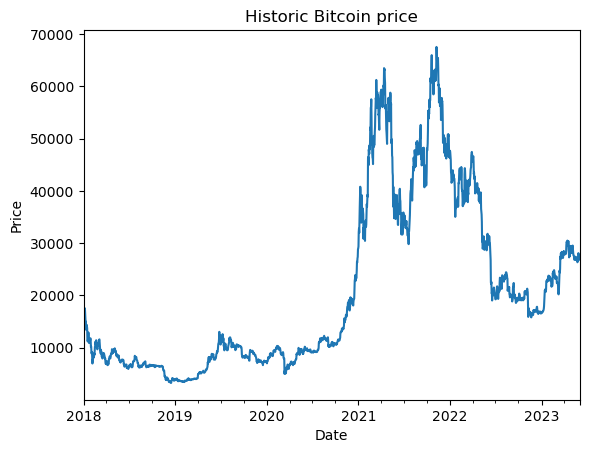

In [4]:
bitcoin.plot()
plt.title('Historic Bitcoin price')
plt.xlabel('Date')
plt.ylabel('Price');

### Gaussian Mixture Model
Next, we fit a [guassian mixture model](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture) on the **daily returns** of bitcoin. Try to identify 3 different market regimes:

In [5]:
X = returns.dropna().values.reshape(-1,1)
mixture = GaussianMixture(n_components=3)
mixture.fit(X)

GaussianMixture(n_components=3)

### Interpret results
Try to interpret the results based on the following dimensions:
1. **Weight**: the weight denotes the proportion of samples belonging to a specific cluster
2. **Mean**: denotes the estimated averages of the gaussian distributions
3. **Standard deviaton**: denotes the standard deviation of the estimated gaussian distributions

In [6]:
for i, weight in enumerate(mixture.weights_):
    print('Mixture {}'.format(i+1))
    print('----------')
    print('Weight: {:.2%}'.format(weight))
    print('Mean:   {:.2%}'.format(mixture.means_[i][0]))
    print('Stdev:  {:.2%}'.format(mixture.covariances_[i, 0, 0]*np.sqrt(250)))
    print('--------------\n ')

Mixture 1
----------
Weight: 68.78%
Mean:   0.08%
Stdev:  0.54%
--------------
 
Mixture 2
----------
Weight: 17.61%
Mean:   -3.38%
Stdev:  3.80%
--------------
 
Mixture 3
----------
Weight: 13.61%
Mean:   4.77%
Stdev:  2.87%
--------------
 
